In [ ]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
BIG_TITLE="CNN raw movement"

In [ ]:
### TIME WINDOWS
w1=512
w2=768
W1=w1
W2=w2

In [ ]:
### LIBRARIES

import tensorflow as tf
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy
import datetime
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from keras.layers import BatchNormalization, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import tensorflow as tf
import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import time
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas
import os

# Remove some unwanted warnings
import logging
logging.getLogger('tensorflow').disabled = True 
from scipy.signal import butter, lfilter
import pywt
import pandas as pd
import numpy as np
import random
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy
import scipy
import scipy.signal
from scipy import fft
### LIBRARIES

import tensorflow as tf
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy
import datetime
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from keras.layers import BatchNormalization, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import tensorflow as tf
import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import time
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy
import pandas
import os

import os
import sys

import pandas as pd
import pandas
import numpy as np

import pywt
import scipy.io as spio
from scipy.stats import entropy
from collections import Counter

from sklearn import svm
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

import timeit

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from keras.layers import LSTM, BatchNormalization, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import tensorflow as tf
import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from numpy import hstack, vstack, dstack
import numpy as np


In [ ]:
def load_signal(k):  #where k is the file name
    data = sio.loadmat(str(k))  
    ###deleting EOGs
    signal_raw= numpy.delete(data["signal"], obj= [63,62,61,60,59,58], axis=0)
    ###deleting 0s:
    signal_raw_trans= numpy.transpose(signal_raw)
    ind=[]
    for cx, c in enumerate(signal_raw_trans):
        if len(c) -  numpy.count_nonzero(c) <=5:
            continue
        else:
            ind.append(cx)
    g= numpy.delete(signal_raw_trans, obj= ind, axis=0)
    signal_raw_trans_clean=numpy.transpose(g)
    
    ###clean memory
    del data
    del signal_raw
    del signal_raw_trans
    del g

    return(signal_raw_trans_clean)

In [ ]:
### cleaned code names
def cleaned_code_names(k):# k=file name
    data = sio.loadmat(str(k)) 
    events= data["header"]["event_codes"]
    EVENTS=[]
    for i in events:
        for e in i:
            for j in e:
                for h in j:
                    if len(str(h))>2:
                        EVENTS.append(h)
    EVENTS=numpy.array(EVENTS)
    
    del data
    del events
    
    return EVENTS

In [ ]:
### cleaned event code
def event_Code(k): # k=file name
    data = sio.loadmat(str(k)) 
    
    labels= str(data["events"]["codes"]).split()
    
    l=[]
    for g in labels:
        for i in g:
            if i.isnumeric():
                l.append(i)
        else:
            l.append(",")
    #cleaning labels 
    l2=[]
    g=""
    for j in l:
        if j.isnumeric():
            g+=j
        elif len(g)<1:
            continue
        else:
            l2.append(int(g))
            g=""
    
    del data
    del labels
    del l
    del g
    
    return l2

### cleaned event position
def event_Position(k):# k=file name
    data = sio.loadmat(str(k)) 
    indices_signal_matrix= str(data["events"]["positions"]).split()
    #cleaning indices_signal_matrix 
    l3=[]
    for g in indices_signal_matrix:
        for i in g:
            if i.isnumeric():
                l3.append(i)
        else:
            l3.append(",")

    l4=[]
    g=""
    for j in l3:
        if j.isnumeric():
            g+=j
        elif len(g)<1:
            continue
        else:
            l4.append(int(g))
            g=""
    l4=l4[:-1]#array of i
    
    del data
    del indices_signal_matrix
    del l3
    del g
    
    return l4

In [ ]:
#indexes of each events within signals
def indexes_event_signals(k):
    data = sio.loadmat(str(k)) 
    EVENTS = cleaned_code_names(k)
    event_codes= event_Code(k)
    dico_indexes={}

    for event in EVENTS:
        indexes_=[]
        for ig, g in enumerate(event_codes):
            if g == event:
                indexes_.append(ig)
        dico_indexes[event]= indexes_
    
    del data
    del EVENTS
    del event_codes
    del indexes_
    
    return dico_indexes

In [ ]:
def start_indexes(k, event):# k= file name, starting_event= code of grasp onset, ending_event:code of grasp offset
    indexes=indexes_event_signals(k)
    event_positions= event_Position(k)
    event_indexes=[]
    
    for h in indexes[event]:
        event_indexes.append(event_positions[h])
    
    del indexes
    del event_positions
    
    return event_indexes

In [ ]:
#signals of movement types (signal of split() function)


def EVENT_SIGNALS(k, EVENT, W1, W2): #starting_event= starting event of the movement, ending_event:ending event of the movement
    #window_size2=int(window_size/2)
    signal= load_signal(str(k)) 
    event_indexs= start_indexes(str(k), EVENT)

    movement_signals=[]
    #print(event_indexs)
    for i in event_indexs:#
        for channel in signal:
            i= int(i)
            #print(i+(window_size2))
            if i-W1>0:
                movement_signals.append(numpy.array(channel[i-W1:i+W2]))# window size would be are most litte event, event would be the ending event
            #print(len(channel[i-window_size2:i+(window_size2+1)]))
            else:
                continue
    del signal
    del event_indexs
    
    return movement_signals


In [ ]:
def create_tensor(data,W1:int, W2,nb_channels:int):
    window_size= W1+W2
    positions_split=[]

    for j in range(0,len(data),nb_channels):
        positions_split.append(j)

    positions_split.append(len(data))
    #print(positions_split)

    all_events=[]
    for i in range(0,len(positions_split)-1):
        #print(i)
        one_event=[]
        for h in range(positions_split[i],positions_split[i+1]):
            #print(h)
            data_shaped=data[h]
            if (len(one_event)==0.0):
                one_event=data_shaped
            else:
                one_event=numpy.vstack((one_event, data_shaped))
        if (len(all_events)==0.0):
                all_events=one_event.reshape(1,nb_channels,window_size)
        else:
                all_events=numpy.vstack((all_events, one_event.reshape(1,nb_channels,window_size)))
        #print(all_events.shape)
    return(all_events)

In [ ]:
import random
import numpy as np

def random_shuffle(final_TENSOR, labels):
    random_indexes_tens= random.sample(range(0, final_TENSOR.shape[0]), final_TENSOR.shape[0])
    event_tensors= [t for t in range(final_TENSOR.shape[0])]#indexes of tensor
    
    #print(random_indexes_tens)
    #print(event_tensors)

    SHUFFLED_TENSOR=[] 
    LABELS_SHUFFLED=[]
    
    for i in event_tensors:
        target_position=random_indexes_tens[i]
        SHUFFLED_TENSOR.append(final_TENSOR[target_position,:,:])
        LABELS_SHUFFLED.append(labels[target_position])

    SHUFFLED_TENSOR=numpy.array(SHUFFLED_TENSOR)
    #SHUFFLED_TENSOR= np.transpose(SHUFFLED_TENSOR, (1,2,0))
    return SHUFFLED_TENSOR, LABELS_SHUFFLED

In [ ]:
# Remove some unwanted warnings
import logging
logging.getLogger('tensorflow').disabled = True 

def add_data(W1:int, W2:int,k:str,event_label:str,EVENT,nb_channels:int):
    #window_size=W1+W2
    partial_TENSOR=[]
    partial_LABEL=[]
    time00 = datetime.datetime.now()
    #for i in k:
    time1 = datetime.datetime.now()
    file='G'+k+'.mat'
    print('processing '+file)
    data=EVENT_SIGNALS(k=file, EVENT=EVENT, W1=W1, W2=W2 )
    data_transformed=create_tensor(data=data,W1=W1, W2=W2,nb_channels=nb_channels)
    label= event_label*data_transformed.shape[0]
    
    if (len(partial_TENSOR)==0.0):
        partial_TENSOR=data_transformed
        partial_LABEL=label
    else:
        partial_TENSOR=numpy.vstack((partial_TENSOR, data_transformed))
        partial_LABEL=partial_LABEL+label
    print('New shape Tensor ', partial_TENSOR.shape)
    print('New shape label ', len(partial_LABEL))
    time2 = datetime.datetime.now()
    elapsedTime = time2 - time1
    print('Minutes it took',elapsedTime)
        
    time01 = datetime.datetime.now()
    elapsedTime0 = time01 - time00
    print('Total time',elapsedTime0)

    return(partial_TENSOR, partial_LABEL) 

In [ ]:
import random
import numpy as np

def random_shuffle(FINAL_TENSOR, labels):
    random_indexes_tens= random.sample(range(0, FINAL_TENSOR.shape[0]), FINAL_TENSOR.shape[0])
    event_tensors= [t for t in range(FINAL_TENSOR.shape[0])]#indexes of tensor
    
    #print(random_indexes_tens)
    #print(event_tensors)

    SHUFFLED_TENSOR=[] 
    LABELS_SHUFFLED=[]
    
    for i in event_tensors:
        target_position=random_indexes_tens[i]
        SHUFFLED_TENSOR.append(FINAL_TENSOR[target_position,:,:])
        LABELS_SHUFFLED.append(labels[target_position])

    SHUFFLED_TENSOR=numpy.array(SHUFFLED_TENSOR)
    #SHUFFLED_TENSOR= np.transpose(SHUFFLED_TENSOR, (1,2,0))
    return SHUFFLED_TENSOR, LABELS_SHUFFLED

In [ ]:
### Here we set our CNN
from keras.callbacks import ModelCheckpoint, EarlyStopping

def run_model():
  nb_channels=58
  window_size=W1+W2
  model = Sequential()
  seed_value=333        
    
    #####
  model.add(Conv2D(filters = 64, kernel_size = (7,7), padding = "same", activation = "elu", input_shape = (nb_channels,window_size,1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (3,3)))
  model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = "same", activation = "elu"))
#model.add(Activation('elu'))# Is this needed? Try without it
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (3,3)))
  model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "elu"))
#model.add(Activation('elu'))#Is this needed? Try without it
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (3,3)))
  model.add(Flatten())
  model.add(Dropout(0.2)) #seed=seed_value)
  model.add(Dense(32, activation = "elu"))
  #model.add(Activation('elu'))#Is this needed? Try without it
  model.add(BatchNormalization())
#model.add(Dropout(0.2))
  model.add(Dense(1, activation = "sigmoid"))#try softax


  adam = Adam(lr = 0.0001)

  model.compile(optimizer = adam, loss = "binary_crossentropy", metrics = ['accuracy','mse']) #tf.math.reduce_std(x, 1), ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity']
# simple early stopping
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)# add "patience=200" if early stopping is done too soon
  return model, es, adam
model, es, adam= run_model()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
with open("model summary "+str(BIG_TITLE)+'.pdf', 'w') as f:
  model.summary(print_fn=lambda x: f.write(x + '\n'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 1280, 64)      3200      
_________________________________________________________________
batch_normalization (BatchNo (None, 58, 1280, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 426, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 426, 64)       102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 19, 426, 64)       256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 142, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 142, 64)        3

In [ ]:
import matplotlib.pyplot as pyplot
import csv

def plot_training_history(history, TITLE):
    acc = history.history['accuracy'] #this does not work, to do
    loss = history.history['loss']
    mse = history.history['mse']
    epochs = range(len(acc))
 
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 1, 1)
    plt.plot(epochs, acc, 'g', label='Training accuracy',linewidth=2) #'g'
    plt.plot(epochs, loss, 'r', label='Training loss',linewidth=2)
    plt.plot(epochs, mse, 'b--', label='MSE',linewidth=2)
    #plt.plot(epochs, ACC, 'g', label='Test acc',linewidth=2)
    plt.title(TITLE, fontsize=10)
    plt.xlabel('Number of epochs', fontsize=8)
    plt.ylabel('Performance indicator', fontsize=8)
    plt.legend()
    
    plt.savefig(str(TITLE)+'.png', bbox_inches='tight')
    plt.savefig(str(TITLE)+'.pdf', bbox_inches='tight')
    #plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:14.829591
Total time 0:00:14.829684
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.463879
Total time 0:00:12.464023
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.372521
Total time 0:00:12.373343
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.311502
Total time 0:00:12.311587
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:13.628369
Total time 0:00:13.628455
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.853208
Total time 0:00:11.853332
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.774805
Total time 0:00:11.775684
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.8

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.174657
Total time 0:00:12.174733
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.090118
Total time 0:00:12.090978
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.087661
Total time 0:00:12.087766
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:11.965391
Total time 0:00:11.965545
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.806385
Total time 0:00:11.806463
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.737615
Total time 0:00:11.737731
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.772719
Total time 0:00:11.772804
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.655005
Total time 0:

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.102314
Total time 0:00:12.102393
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.125128
Total time 0:00:12.125228
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.074101
Total time 0:00:12.074230
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.111436
Total time 0:00:12.111512
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.586900
Total time 0:00:11.586995
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.550701
Total time 0:00:11.550794
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.663552
Total time 0:00:11.663655
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.498742
Total time 0:

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.406640
Total time 0:00:12.406720
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.400483
Total time 0:00:12.400581
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.351521
Total time 0:00:12.351592
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.232215
Total time 0:00:12.232936
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.889722
Total time 0:00:11.889836
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.964410
Total time 0:00:11.964566
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.964272
Total time 0:00:11.964380
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.955929
Total time 0:

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:11.999363
Total time 0:00:11.999441
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:11.991035
Total time 0:00:11.991159
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.100382
Total time 0:00:12.101663
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.291466
Total time 0:00:12.291542
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.843097
Total time 0:00:11.843194
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.499131
Total time 0:00:11.499215
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.254510
Total time 0:00:11.254627
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.569211
Total time 0:

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.175479
Total time 0:00:12.175556
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.301459
Total time 0:00:12.301571
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.203712
Total time 0:00:12.203773
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.270655
Total time 0:00:12.270738
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.674680
Total time 0:00:11.674761
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.703881
Total time 0:00:11.703952
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.893608
Total time 0:00:11.893700
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.905465
Total time 0:

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.717654
Total time 0:00:12.717733
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.580949
Total time 0:00:12.581021
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.662474
Total time 0:00:12.662605
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.655807
Total time 0:00:12.655946
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.165842
Total time 0:00:12.165923
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.140772
Total time 0:00:12.140884
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.200128
Total time 0:00:12.201067
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.027118
Total time 0:

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.461574
Total time 0:00:12.461666
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.342683
Total time 0:00:12.342790
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.419519
Total time 0:00:12.419614
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.448817
Total time 0:00:12.449222
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.751790
Total time 0:00:11.751867
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.959548
Total time 0:00:11.959641
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.941321
Total time 0:00:11.941463
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.076355
Total time 0:

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.662437
Total time 0:00:12.662539
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.630942
Total time 0:00:12.631018
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.701793
Total time 0:00:12.701870
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.558820
Total time 0:00:12.558931
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.142030
Total time 0:00:12.142180
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.997004
Total time 0:00:11.997108
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.069800
Total time 0:00:12.069908
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.102792
Total time 0:

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.444142
Total time 0:00:12.444230
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.219666
Total time 0:00:12.219740
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.259666
Total time 0:00:12.259757
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.222220
Total time 0:00:12.223120
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.750338
Total time 0:00:11.750418
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.757448
Total time 0:00:11.757553
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.724798
Total time 0:00:11.724875
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.849382
Total time 0:

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.668843
Total time 0:00:12.668929
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.549716
Total time 0:00:12.550556
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.620758
Total time 0:00:12.621747
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.669043
Total time 0:00:12.669124
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.113700
Total time 0:00:12.113805
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.143931
Total time 0:00:12.144007
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.112092
Total time 0:00:12.112175
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.099887
Total time 0:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


processing G11.mat
New shape Tensor  (80, 58, 1280)
New shape label  80
Minutes it took 0:00:14.613113
Total time 0:00:14.613208
processing G11.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:14.683308
Total time 0:00:14.683398
processing G11.mat
New shape Tensor  (80, 58, 1280)
New shape label  80
Minutes it took 0:00:14.570961
Total time 0:00:14.571034
processing G11.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:14.550473
Total time 0:00:14.550550
TEST_TENSOR shape: (318, 58, 1280, 1)
y test length: 318
10/10 [==============================] - 0s 25ms/step - loss: 0.1807 - accuracy: 0.9277 - mse: 0.0532
[[156   3]
 [ 20 139]]
Accuracy : 92.767296
Sensitivity :98.113208
Specificity :87.421384
Precision :52.881356
processing G01.mat


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.570352
Total time 0:00:12.570498
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.721092
Total time 0:00:12.721169
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.727588
Total time 0:00:12.728468
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.687572
Total time 0:00:12.687641
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.142830
Total time 0:00:12.142941
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.106340
Total time 0:00:12.106446
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.072708
Total time 0:00:12.072799
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.172903
Total time 0:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


processing G12.mat
New shape Tensor  (80, 58, 1280)
New shape label  80
Minutes it took 0:00:13.925169
Total time 0:00:13.925314
processing G12.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:13.803903
Total time 0:00:13.806823
processing G12.mat
New shape Tensor  (80, 58, 1280)
New shape label  80
Minutes it took 0:00:13.909519
Total time 0:00:13.909611
processing G12.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:13.890992
Total time 0:00:13.891103
TEST_TENSOR shape: (318, 58, 1280, 1)
y test length: 318
10/10 [==============================] - 0s 27ms/step - loss: 0.0710 - accuracy: 0.9811 - mse: 0.0184
[[157   2]
 [  4 155]]
Accuracy : 98.113208
Sensitivity :98.742138
Specificity :97.484277
Precision :50.320513
processing G01.mat


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.774219
Total time 0:00:12.774322
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.701687
Total time 0:00:12.702411
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.753468
Total time 0:00:12.753558
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.726933
Total time 0:00:12.727010
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.167628
Total time 0:00:12.167732
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.201387
Total time 0:00:12.202284
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.135944
Total time 0:00:12.136029
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.051088
Total time 0:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


processing G13.mat
New shape Tensor  (78, 58, 1280)
New shape label  78
Minutes it took 0:00:14.046805
Total time 0:00:14.046898
processing G13.mat
New shape Tensor  (78, 58, 1280)
New shape label  78
Minutes it took 0:00:14.005785
Total time 0:00:14.005885
processing G13.mat
New shape Tensor  (78, 58, 1280)
New shape label  78
Minutes it took 0:00:13.784374
Total time 0:00:13.784458
processing G13.mat
New shape Tensor  (78, 58, 1280)
New shape label  78
Minutes it took 0:00:13.963194
Total time 0:00:13.963325
TEST_TENSOR shape: (312, 58, 1280, 1)
y test length: 312
10/10 [==============================] - 0s 25ms/step - loss: 0.1860 - accuracy: 0.9231 - mse: 0.0544
[[145  11]
 [ 13 143]]
Accuracy : 92.307692
Sensitivity :92.948718
Specificity :91.666667
Precision :50.347222
processing G01.mat


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.660593
Total time 0:00:12.660683
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.713468
Total time 0:00:12.713566
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.731583
Total time 0:00:12.731659
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.744805
Total time 0:00:12.744879
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.211342
Total time 0:00:12.211458
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.209167
Total time 0:00:12.209250
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.102670
Total time 0:00:12.102774
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:12.047373
Total time 0:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


processing G14.mat
New shape Tensor  (69, 58, 1280)
New shape label  69
Minutes it took 0:00:10.619628
Total time 0:00:10.619716
processing G14.mat
New shape Tensor  (70, 58, 1280)
New shape label  70
Minutes it took 0:00:10.622670
Total time 0:00:10.622779
processing G14.mat
New shape Tensor  (69, 58, 1280)
New shape label  69
Minutes it took 0:00:10.439745
Total time 0:00:10.439835
processing G14.mat
New shape Tensor  (70, 58, 1280)
New shape label  70
Minutes it took 0:00:10.532187
Total time 0:00:10.532264
TEST_TENSOR shape: (278, 58, 1280, 1)
y test length: 278
9/9 [==============================] - 0s 37ms/step - loss: 0.1909 - accuracy: 0.9317 - mse: 0.0506
[[128  11]
 [  8 131]]
Accuracy : 93.165468
Sensitivity :92.086331
Specificity :94.244604
Precision :49.420849
processing G01.mat


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.408157
Total time 0:00:12.408232
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.215122
Total time 0:00:12.215238
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.348336
Total time 0:00:12.348436
processing G01.mat
New shape Tensor  (79, 58, 1280)
New shape label  79
Minutes it took 0:00:12.263182
Total time 0:00:12.263953
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.654782
Total time 0:00:11.654876
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.985828
Total time 0:00:11.985912
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.700726
Total time 0:00:11.700808
processing G02.mat
New shape Tensor  (75, 58, 1280)
New shape label  75
Minutes it took 0:00:11.912980
Total time 0:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


processing G15.mat
New shape Tensor  (76, 58, 1280)
New shape label  76
Minutes it took 0:00:14.875694
Total time 0:00:14.875772
processing G15.mat
New shape Tensor  (78, 58, 1280)
New shape label  78
Minutes it took 0:00:14.756129
Total time 0:00:14.756221
processing G15.mat
New shape Tensor  (76, 58, 1280)
New shape label  76
Minutes it took 0:00:14.696746
Total time 0:00:14.696832
processing G15.mat
New shape Tensor  (78, 58, 1280)
New shape label  78
Minutes it took 0:00:14.756394
Total time 0:00:14.756511
TEST_TENSOR shape: (308, 58, 1280, 1)
y test length: 308
10/10 [==============================] - 0s 25ms/step - loss: 0.2115 - accuracy: 0.8929 - mse: 0.0670
[[153   1]
 [ 32 122]]
Accuracy : 89.285714
Sensitivity :99.350649
Specificity :79.220779
Precision :55.636364


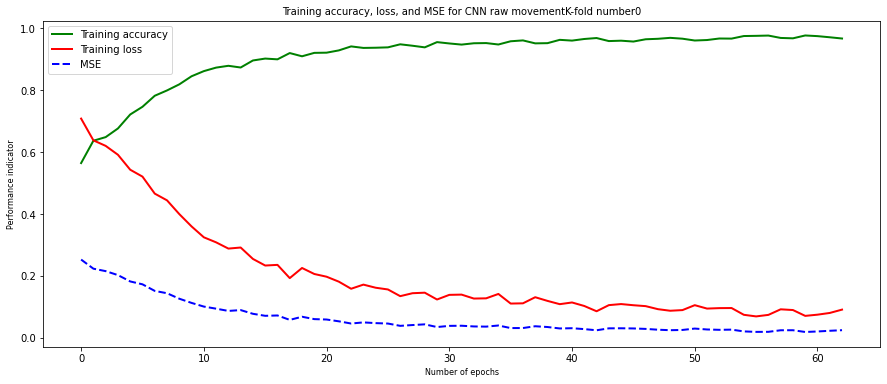

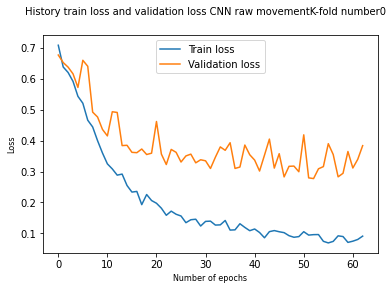

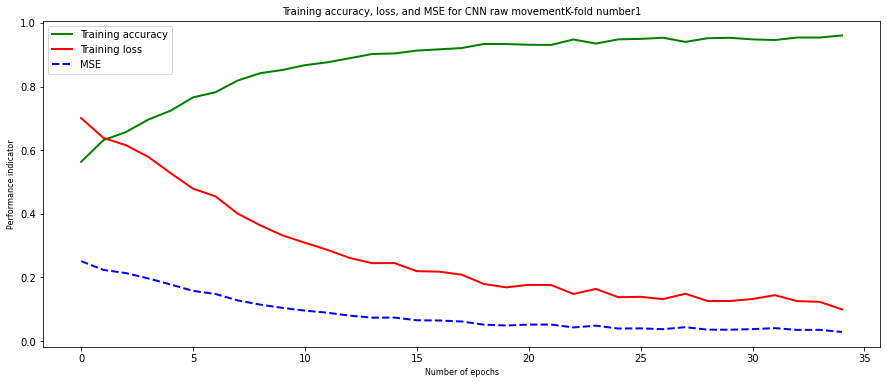

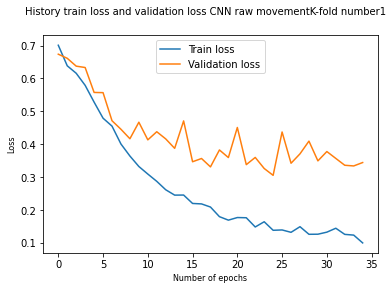

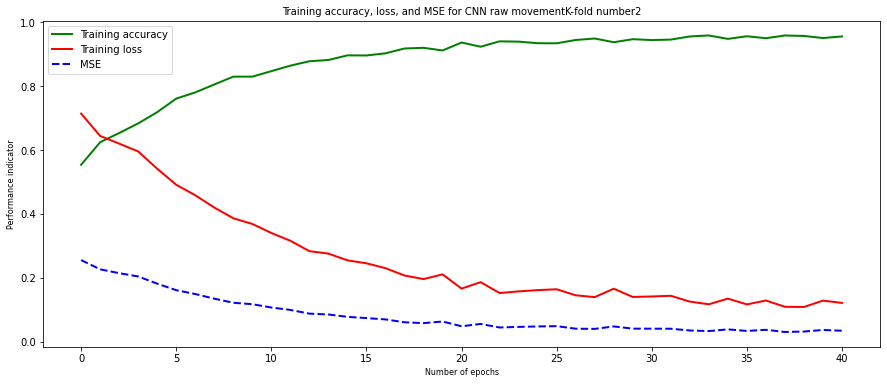

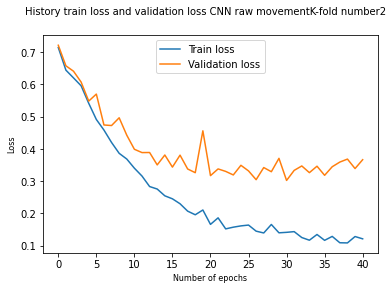

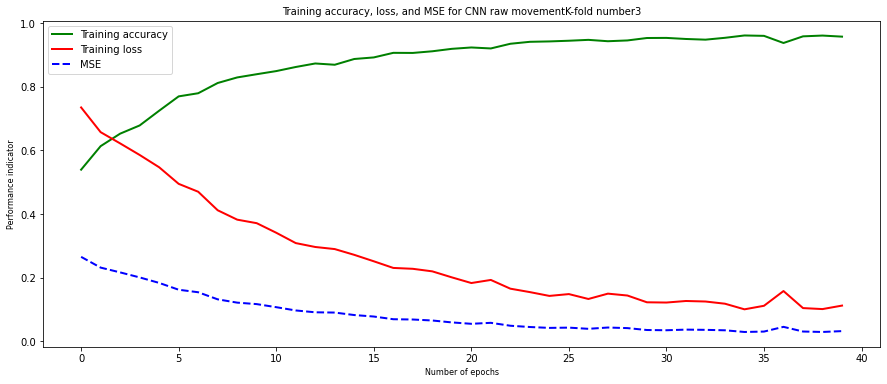

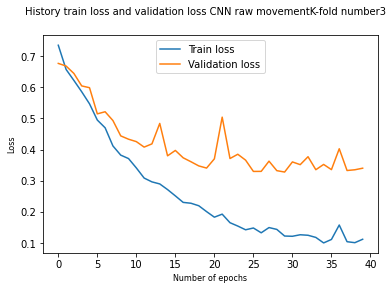

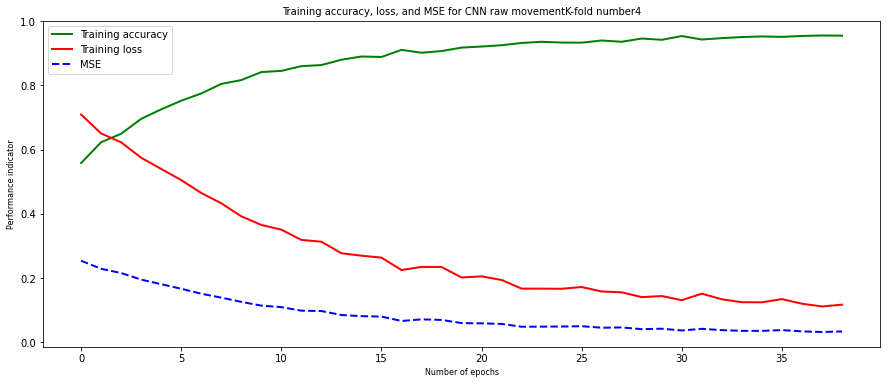

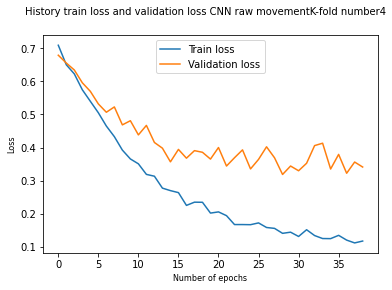

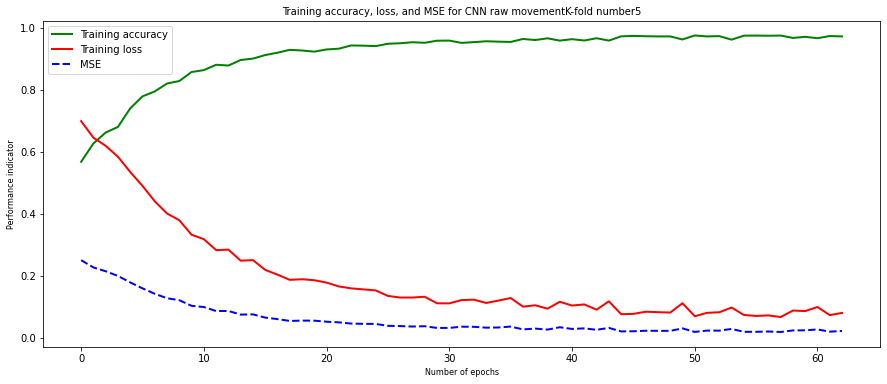

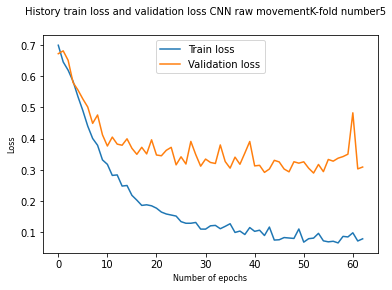

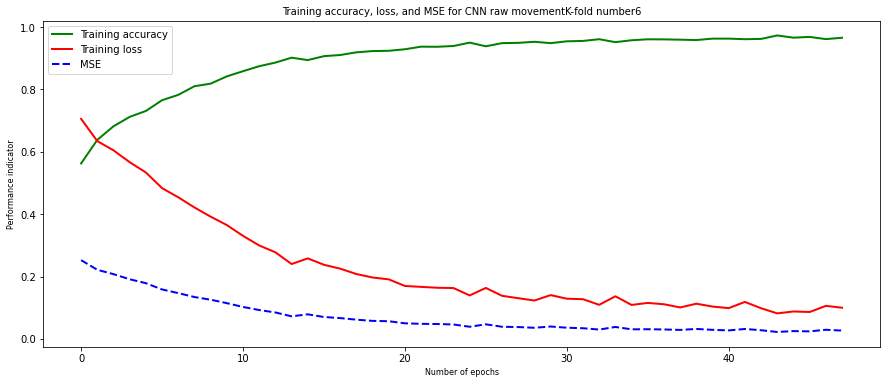

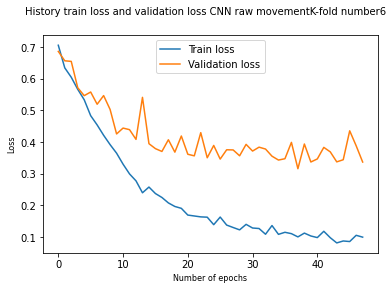

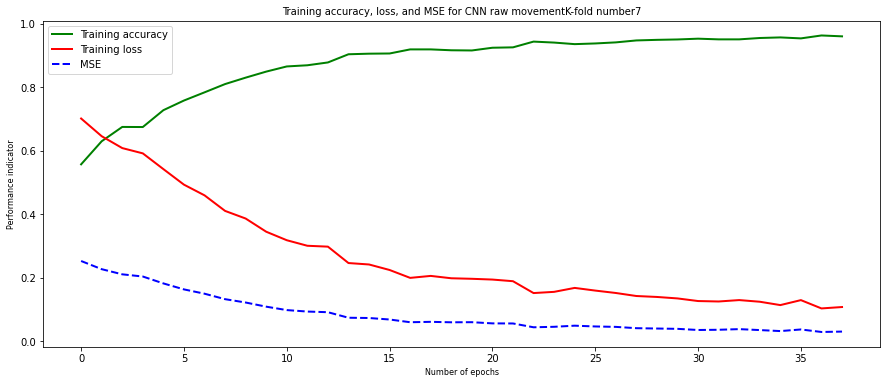

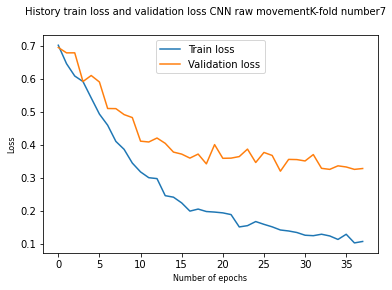

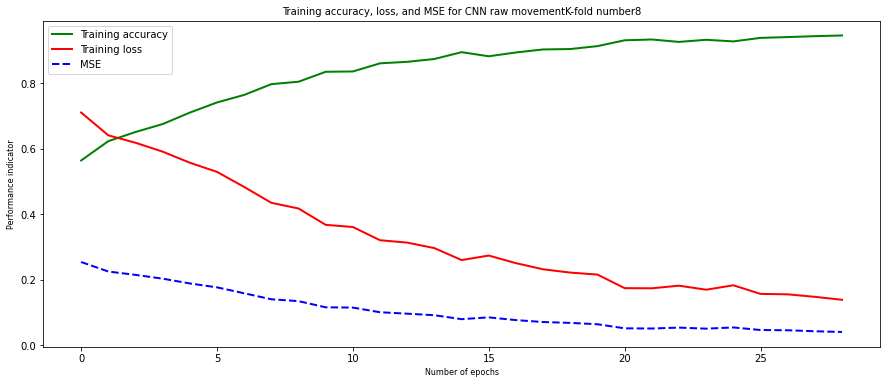

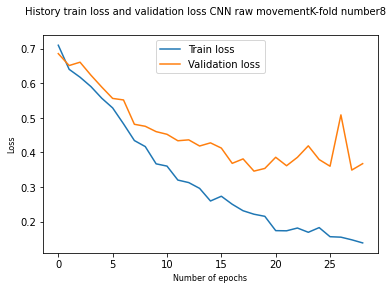

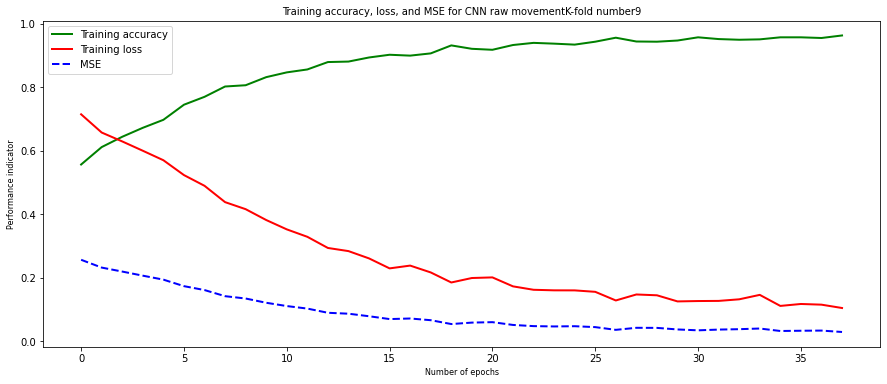

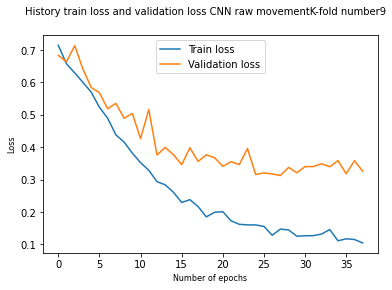

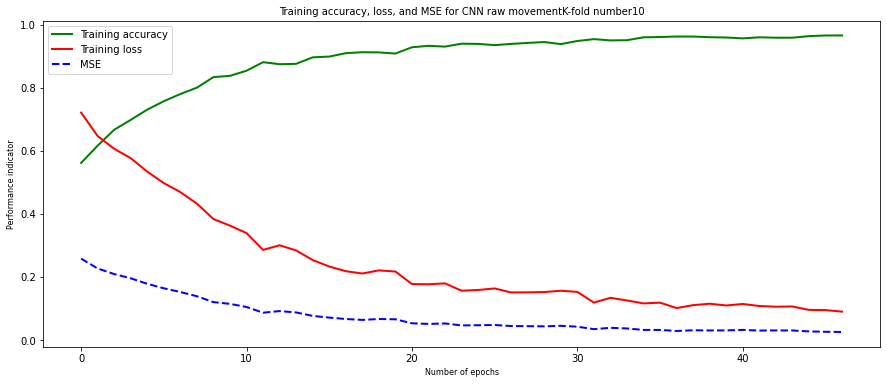

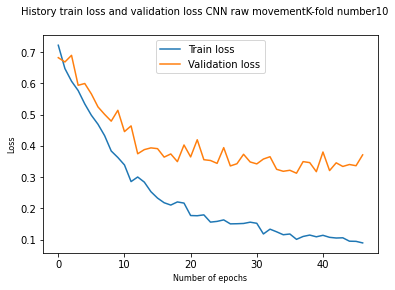

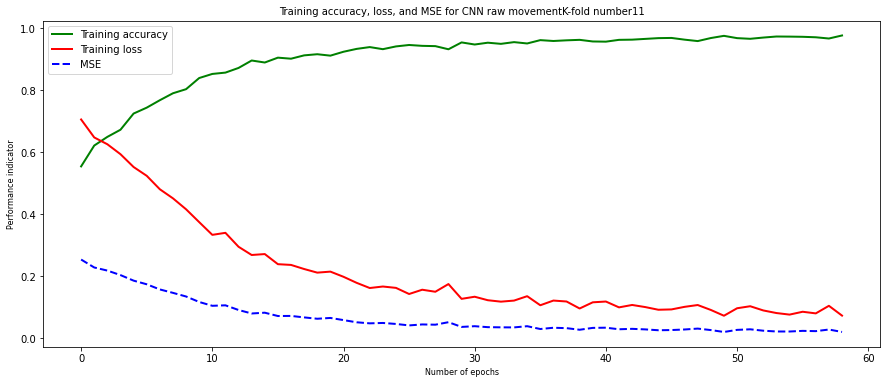

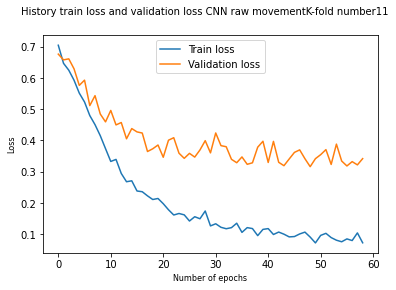

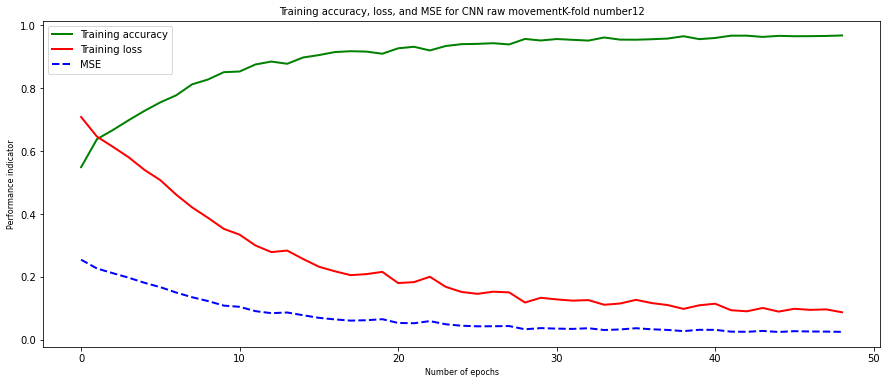

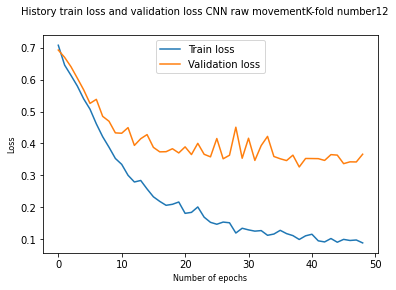

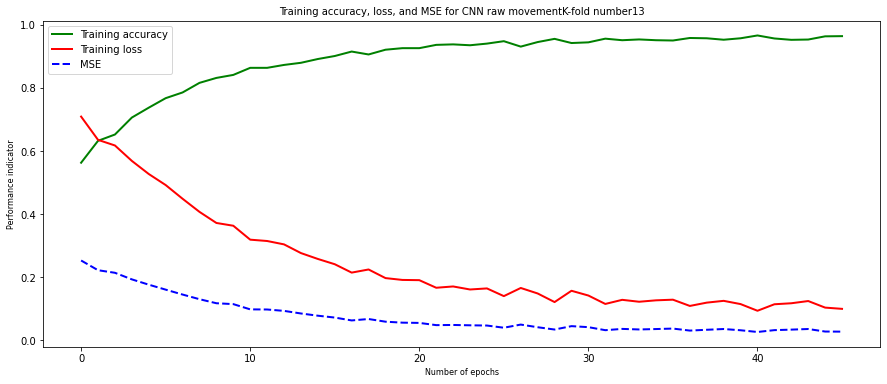

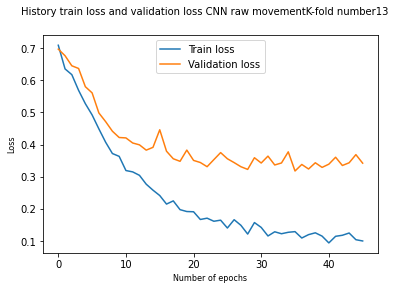

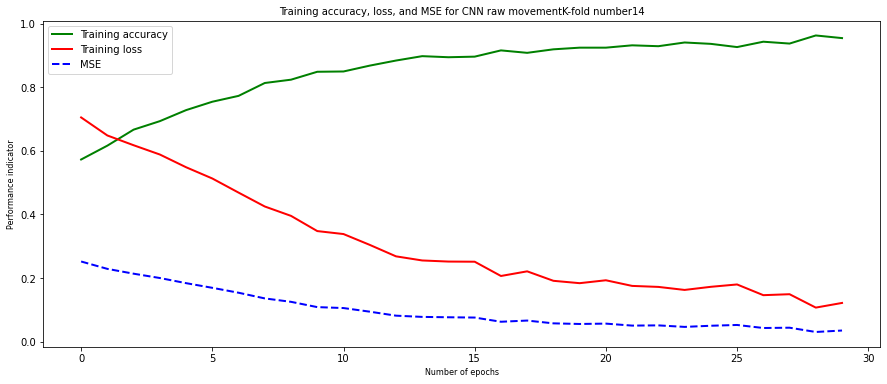

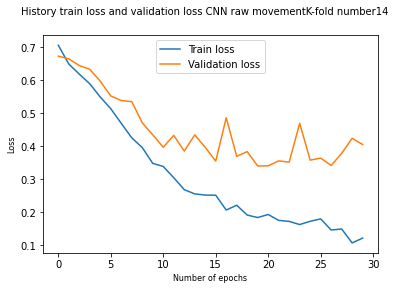

In [ ]:
#Training of CNN
# .....................
nb_channels=58
window_size=W1+W2
training_accuracies=[]
test_accuracies=[]
files= ['01','02','03','04','05','06','07','08','09','10','11','12','13','14', '15']#LEAVE ONE OUT 15, for test
accuracies={}
histories={}
training_time=[]

for g in range(len(files)):
  train_files= [files[:g]+ files[g+1:]]
  test_file=[files[g]]
  model, es, adam=run_model()

  for file in files:
    
    ###
      REACH_TENSOR, REACH_LABELS = add_data(W1=W1, W2=W2,k=file,event_label=['REACH'],EVENT=503587,nb_channels=nb_channels)
    
      REACH_TENSOR2, REACH_LABELS2 = add_data(W1=W1, W2=W2,k=file,
                                          event_label=['REACH'],EVENT=503588,nb_channels=nb_channels)
    
      GRASP_TENSOR, GRASP_LABELS = add_data(W1=W1, W2=W2,k=file,
                                          event_label=['GRASP'],EVENT=501794,nb_channels=nb_channels) 
      GRASP_TENSOR2, GRASP_LABELS2 = add_data(W1=W1, W2=W2,k=file,
                                          event_label=['GRASP'],EVENT=501795,nb_channels=nb_channels)
    
      try:
          FINAL_TENSOR=numpy.vstack((FINAL_TENSOR,REACH_TENSOR,REACH_TENSOR2, GRASP_TENSOR, GRASP_TENSOR2))
          labels=labels+REACH_LABELS+REACH_LABELS2+GRASP_LABELS+GRASP_LABELS2
        
      except NameError:
          FINAL_TENSOR=numpy.vstack((REACH_TENSOR,REACH_TENSOR2, GRASP_TENSOR, GRASP_TENSOR2))
          labels=REACH_LABELS+REACH_LABELS2+GRASP_LABELS+GRASP_LABELS2

  X_train, X_val, y_train, y_val = train_test_split(FINAL_TENSOR, labels, test_size =0.3, random_state=0)

  X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
  X_val=X_val.reshape(X_val.shape[0],X_val.shape[1],X_val.shape[2],1)

  print("x train shape", X_train.shape)
  print("x val shape", X_val.shape)
  print("y train length", len(y_train))
  print("y train length", len(y_val))

  del FINAL_TENSOR
  del REACH_TENSOR 
  del REACH_LABELS
  del REACH_TENSOR2 
  del REACH_LABELS2
  del GRASP_TENSOR
  del GRASP_LABELS
  del GRASP_TENSOR2
  del GRASP_LABELS2 

  onehot = LabelBinarizer()
  y_train = onehot.fit_transform(y_train)
  y_val = onehot.transform(y_val)
  ####
  start = time.time()
  TITLE= "Training accuracy, loss, and MSE for "+BIG_TITLE+ "K-fold number"+ str(g)

  histories[TITLE]= model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=10, callbacks=[es])#works with epochs = 10
  stop = time.time() 

  training_accuracies.append(histories[TITLE].history['accuracy'])
  training_time.append(stop - start)

  plot_training_history(histories[TITLE], TITLE)

  fig = plt.figure()
  pyplot.plot(histories[TITLE].history['loss'], label='Train loss')
  pyplot.plot(histories[TITLE].history['val_loss'], label='Validation loss')

  TITLE= "History train loss and validation loss "+BIG_TITLE+ "K-fold number"+ str(g)
  fig.suptitle(TITLE, fontsize=10)
  plt.xlabel('Number of epochs', fontsize=8)
  plt.ylabel('Loss', fontsize=8)

  pyplot.legend(loc='upper center')

  plt.savefig(str(TITLE)+'.png', bbox_inches='tight')
  plt.savefig(str(TITLE)+'.pdf', bbox_inches='tight')

  del X_train
  del X_val
  del y_train
  del y_val

###################################
  for file in test_file:
    REACH_TENSOR, REACH_LABELS = add_data(W1=W1, W2=W2,k=file,event_label=['REACH'],EVENT=503587,nb_channels=nb_channels)
    
    REACH_TENSOR2, REACH_LABELS2 = add_data(W1=W1, W2=W2,k=file,
                                         event_label=['REACH'],EVENT=503588,nb_channels=nb_channels)
    
    GRASP_TENSOR, GRASP_LABELS = add_data(W1=W1, W2=W2,k=file,
                                         event_label=['GRASP'],EVENT=501794,nb_channels=nb_channels) 
    GRASP_TENSOR2, GRASP_LABELS2 = add_data(W1=W1, W2=W2,k=file,
                                         event_label=['GRASP'],EVENT=501795,nb_channels=nb_channels)
    try:
        TEST_TENSOR=numpy.vstack((TEST_TENSOR,REACH_TENSOR,REACH_TENSOR2, GRASP_TENSOR, GRASP_TENSOR2))
        labels_test=labels_test+REACH_LABELS+REACH_LABELS2+GRASP_LABELS+GRASP_LABELS2
        
    except NameError:
        TEST_TENSOR=numpy.vstack((REACH_TENSOR,REACH_TENSOR2, GRASP_TENSOR, GRASP_TENSOR2))
        labels_test=REACH_LABELS+REACH_LABELS2+GRASP_LABELS+GRASP_LABELS2

  TEST_TENSOR, labels_test=random_shuffle(TEST_TENSOR, labels_test)
  TEST_TENSOR=TEST_TENSOR.reshape(TEST_TENSOR.shape[0],TEST_TENSOR.shape[1],TEST_TENSOR.shape[2],1)
  y_test = onehot.transform(labels_test)
  print("TEST_TENSOR shape:", TEST_TENSOR.shape)
  print("y test length:", len(y_test))

  test_loss, test_acc, test_mse = model.evaluate(TEST_TENSOR, y_test)
  test_accuracies.append(test_acc)

##storing for ROC curve
  y_pred = model.predict(TEST_TENSOR)
  y_pred_keras=y_pred.ravel()
  fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
  ROC= ["fpr_keras:", fpr_keras, "tpr_keras :", tpr_keras, "thresholds_keras:", thresholds_keras]
##storing for AUC curve
  auc_keras = auc(fpr_keras, tpr_keras)
  AUC= ["auc_keras:", auc_keras]

# Creating the Confusion Matrix
  y_pred_n=[]
  for i in y_pred:
    if i >= 0.5:
      y_pred_n.append(1)
    else:
      y_pred_n.append(0)
  y_pred= y_pred_n
#del y_pred_n
  cm = confusion_matrix(y_test, y_pred)
  print(cm)

  total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
  accuracy1=(cm[0,0]+cm[1,1])/float(total1)
  acc="Accuracy : %f" %(accuracy1*100)
  print("Accuracy : %f" %(accuracy1*100))

  sensitivity1 = float(cm[0,0])/(cm[0,0]+cm[0,1])
  sens="Sensitivity :%f" %(sensitivity1*100)
  print("Sensitivity :%f" %(sensitivity1*100))

  specificity1 = float(cm[1,1])/(cm[1,0]+cm[1,1])
  spe="Specificity :%f"%(specificity1*100)
  print("Specificity :%f"%(specificity1*100))

  precision1 = float(cm[0,0])/(cm[0,0]+cm[1,1])
  pre="Precision :%f" %(precision1*100)
  print("Precision :%f" %(precision1*100))

  F1score= 2*((precision1*sensitivity1)/(precision1+sensitivity1))

  TITLE= "Test results & training time "+BIG_TITLE+ "K-fold number"+ str(g)


  with open(str(TITLE)+".csv", 'w', newline='', ) as file:
      writer = csv.writer(file)
      writer.writerow(["Test acc:", test_acc])
      writer.writerow(["Test loss:", test_loss])
      writer.writerow(["Test mse:", test_mse])
      writer.writerow(["ROC:", ROC])
      writer.writerow(["AUC:", AUC])
      writer.writerow(["CM:",cm])
      writer.writerow(["accuracy:",acc])
      writer.writerow(["sensitivity/recall:", sens])
      writer.writerow(["specificity:", spe])
      writer.writerow(["precision",pre])
      writer.writerow(["Training time:", training_time])

  del TEST_TENSOR
  del labels_test
  del y_test
  del y_pred


In [ ]:
import math

def variance(data, ddof=0):
  n = len(data)
  mean = sum(data) / n
  return sum((x - mean) ** 2 for x in data) / (n - ddof)

def stdev(data):
  var = variance(data)
  std_dev = math.sqrt(var)
  return std_dev

def Average(lst):
    return sum(lst) / len(lst)

SE_test= stdev(test_accuracies)
Mean_accuracy= Average(test_accuracies)

with open(str(BIG_TITLE+"SE")+".csv", 'w', newline='', ) as file:
      writer = csv.writer(file)
      writer.writerow(["SE_test", SE_test])
      writer.writerow(["Mean_accuracy", Mean_accuracy])

In [ ]:
print(SE_test*100)

2.604098655582426


In [ ]:
print(Mean_accuracy*100)

93.70906273523967


In [ ]:
test_accuracies

[0.9398733973503113,
 0.9266666769981384,
 0.952531635761261,
 0.9834437370300293,
 0.8999999761581421,
 0.9528301954269409,
 0.9642857313156128,
 0.90625,
 0.9455128312110901,
 0.9285714030265808,
 0.9276729822158813,
 0.9811320900917053,
 0.9230769276618958,
 0.931654691696167,
 0.8928571343421936]